## Prior to peer review:
##### Summarized from: https://advances.sciencemag.org/content/information-authors
1. Up to ten figures and/or tables, combined.
2. up to 60 references
3. Allows for supplementary materials
4. Total length under 15,000 words
5. Provide a long (135 characters) and short title (50 characters) for paper
6. Section order: Intro, Results, Discussion, Materials and Methods, References, Acknowledgments
7. Subheadings should either be all phrases, or all full sentences. Keep <10 words.
8. No new data in discussion, all data should be presented in Results.
9. Materials and Methods: Start with Experimental Design to describe objective of studies and design of the studies. Include Statistical Analysis that describes statistical methods such that reader could reproduce results; value for each statistical test performed should be labeled in relevant figures presented in Results.
10. Acknowledgments should list funding info, authors' contributions to paper, competing interests, a section on data and materials availability
11. Visit 'https://advances.sciencemag.org/content/information-authors' for details on the "Experimental Design and Statistics Guidelines" for writing the methods section.
12. Figure widths 1, 1.5, or 2 column (3.5, 5.0, 7.3 inches wide). No title on figure, figure goes in caption (also called 'legend' in the authors' guide). Solid symbols for plotting when possible, 6pt minimum symbol size, line width minimum 0.5pt. Scales and axes should not extend beyond the range of data plotted. Common axis labels not repeated. No grid lines or minor tick marks. Do not use red-green color combos. Sans-serif font required; Myriad font preferred for text. Regarding scientific notation -- When an individual value must be presented as an exponential, use correct form: 6 × 10–3, not 6e-03. Avoid shading with light lines or screen-shades; use black and white, hatched, cross-hatched designs for emphasis. Capitalize first letters in labels only, not every word. Units should be included in parentheses with SI notation. Variables are set in italics or plain greek letters; vectors are roman boldface. Type on top of color in a color figure should be boldface, avoid using color type (ie color-on-color?). Include leading zeroes on all decimals. Use letters to segregate multi-part images; letters should be boldface, 9pt in the upper-left corner of each figure part. If figure parts are images, set the letter into the image so as to not add white space around the image. Use 300dpi images.
13. SET AS DOUBLE-SPACED THROUGHOUT TEXT FOR SUBMISSION! Includes text, tables, fig legends, refs, everything. 
14. For LaTeX, submit as a PDF file
15. If preparing a supplementary materials section, include it in the main PDF for the initial submission in a new section labeled 'Supplementary Materials'.

##### Some notes on finishing this paper for SciAdv, AFTER peer review process:
1. Remove `\ref{Fig1}` and instead type out 'Fig. 1' in the paper.
2. For the table summary figure, generate this elsewhere and save as an image.
3. Make sure no spaces between citations in multi-citation cites (use the \cite command)
4. For *final* submission, \figure environment should not be used. Figure captions should be included at the end of the source file with figure graphics uploaded separately based on AAAS art department instructions. See author information page 'Figure legends' and 'Figures' sections.
5. Minimize use of any .sty and .bst files, aside from the two provided by AAAS (scicite.sty and ScienceAdvances.bst)

### Important items for figures for Scientific Advances:
1. Size: (3.5, 5.0, 7.3 inches wide)
2. No titles, caption should start with a sentence or bolded phrase describing the contents of the figure.
3. Solid symbols for plotting when possible, 6pt minimum symbol size, line width minimum 0.5pt. 
4. Scales and axes should not extend beyond the range of data plotted. 
5. Common axis labels not repeated. 
6. No grid lines or minor tick marks. 
7. Do not use red-green color combos. 
8. Sans-serif font required; Myriad font preferred for text. 
9. Regarding scientific notation -- When an individual value must be presented as an exponential, use correct form: 6 × 10–3, not 6e-03. 
10. Avoid shading with light lines or screen-shades; use black and white, hatched, cross-hatched designs for emphasis. 
11. Capitalize first letters in labels only, not every word. 
12. Units should be included in parentheses with SI notation.
13. Variables are set in italics or plain greek letters; vectors are roman boldface.
14. Type on top of color in a color figure should be boldface, avoid using color type (ie color-on-color?). 
15. Include leading zeroes on all decimals.
16. Use letters to segregate multi-part images; letters should be boldface, 9pt in the upper-left corner of each figure part. If figure parts are images, set the letter into the image so as to not add white space around the image.
17. Use 300dpi images.

In [1]:
%load_ext autoreload
%autoreload 2

import json, os

import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.ticker as mtick
import matplotlib as mpl
from matplotlib.patches import FancyArrowPatch

from Experiment import Experiment
from figure_functions import compute_rolling_average, prediction_compare_plot, latent_space_plot, loss_boxplot
from figure_functions import training_loss_epochs_plot, waterfall_plot, generate_GL_plot, generate_G_plot, summary_boxplot

In [2]:
import matplotlib.pyplot as plt

# Set plotting parameters
global_params = {'figure.dpi': 600,  # DPI to render figure
                 'text.usetex': True,  # Tells matplotlib to use LaTeX to render labels, titles, etc. so you can use ${math}$
                 'text.latex.preamble': r"\usepackage{amsfonts,amsmath,amssymb}", # Any packages you want LaTeX to load
                 'font.family': 'sans-serif',  # Use sans serif texts
                 'savefig.dpi': 600,  # DPI for saved figure
                 'savefig.pad_inches': 0.025,  # Padding (white space) around saved figures
                 'savefig.transparent': True,  # Makes the background transparent -- this is useful if you save .svg files and want to overlay them
                 # Box plot settings
                 'boxplot.boxprops.linewidth': 0.5,  # Width of the perimeter box at 
                 'boxplot.whiskerprops.linewidth': 0.5,  # Linewidth of the whisker vertical lines
                 'boxplot.capprops.linewidth': 0.5,  # width of the whisker cap (the horizontal line at top/bottom of the box whisker)
                 'boxplot.medianprops.linewidth' : 0.5,  # Linewidth of the median line in the quartile box
                }

full_params = {'figure.figsize': (7.3, 3.65),  # In inches
               'figure.titlesize': 12,  # Title font size, point size ('suptitle')
               'axes.labelsize': 10,  # Axes tick labels font size, point size
               'axes.titlesize': 12,  # Axes figure label font size, point size ('Axes' object level)
               'legend.fontsize': 10,  # Legend text font size, point size
               'xtick.labelsize': 12,  # X axis tick labels font size, point size
               'ytick.labelsize': 12,  # Y axis tick labels font size, point size
               'lines.linewidth': 1.75, # Width of lines on plots
              }

half_params = {'figure.figsize': (3.5, 2.5),
               'figure.titlesize': 10,
               'lines.linewidth' : 1, 
               'axes.labelsize': 9,
               'axes.titlesize': 9,
               'legend.fontsize': 9,
               'xtick.labelsize': 9,
               'ytick.labelsize': 9,
               'axes.linewidth': 0.5,  # Thickness of the axes frame
               'lines.markersize' : 6,  # Size of markers on plot lines
               'lines.markeredgewidth': 0.5,  # Thickness of marker outlines
               'xtick.major.width': 0.5,  # Length of the major tickmarks on the x axis
               'ytick.major.width': 0.5,  # Length of the major tickmarks on the y axis
               'ytick.minor.width': 0.3,  # Length of the minor tickmarks on the y axis
               'ytick.major.pad': 0.0,  # Distance between end of tickmark and the tick labels
              }

# Add global parameters to the full_params and half_params dictionaries
full_params.update(global_params)
half_params.update(global_params)

# Before each figure, you can do the following procedure:
plt.rcdefaults()  # Reset the rcParams defaults

# Create a new 'plot_params' dictionary which copies either 'full_params' for full-width figs or 'half_params' for half-width
plot_params = full_params.copy()

# If you want any figure-specific changes, you can modify the dictionary entry like this:
plot_params['lines.linewidth'] = 1.5

# Then update pyplot rcParams with the dictionary:
plt.rcParams.update(plot_params)

# Boolean determining if figures should be saved (all figures or summary-only)
saveallfigs = True
savesumfigs = False

In [3]:
# Load up the different experiments for analysis
s0 = Experiment(experiment_name="S0-NLSL1-Expt1-L20-a", data_file_prefix='S0-Oscillator')

expt = s0

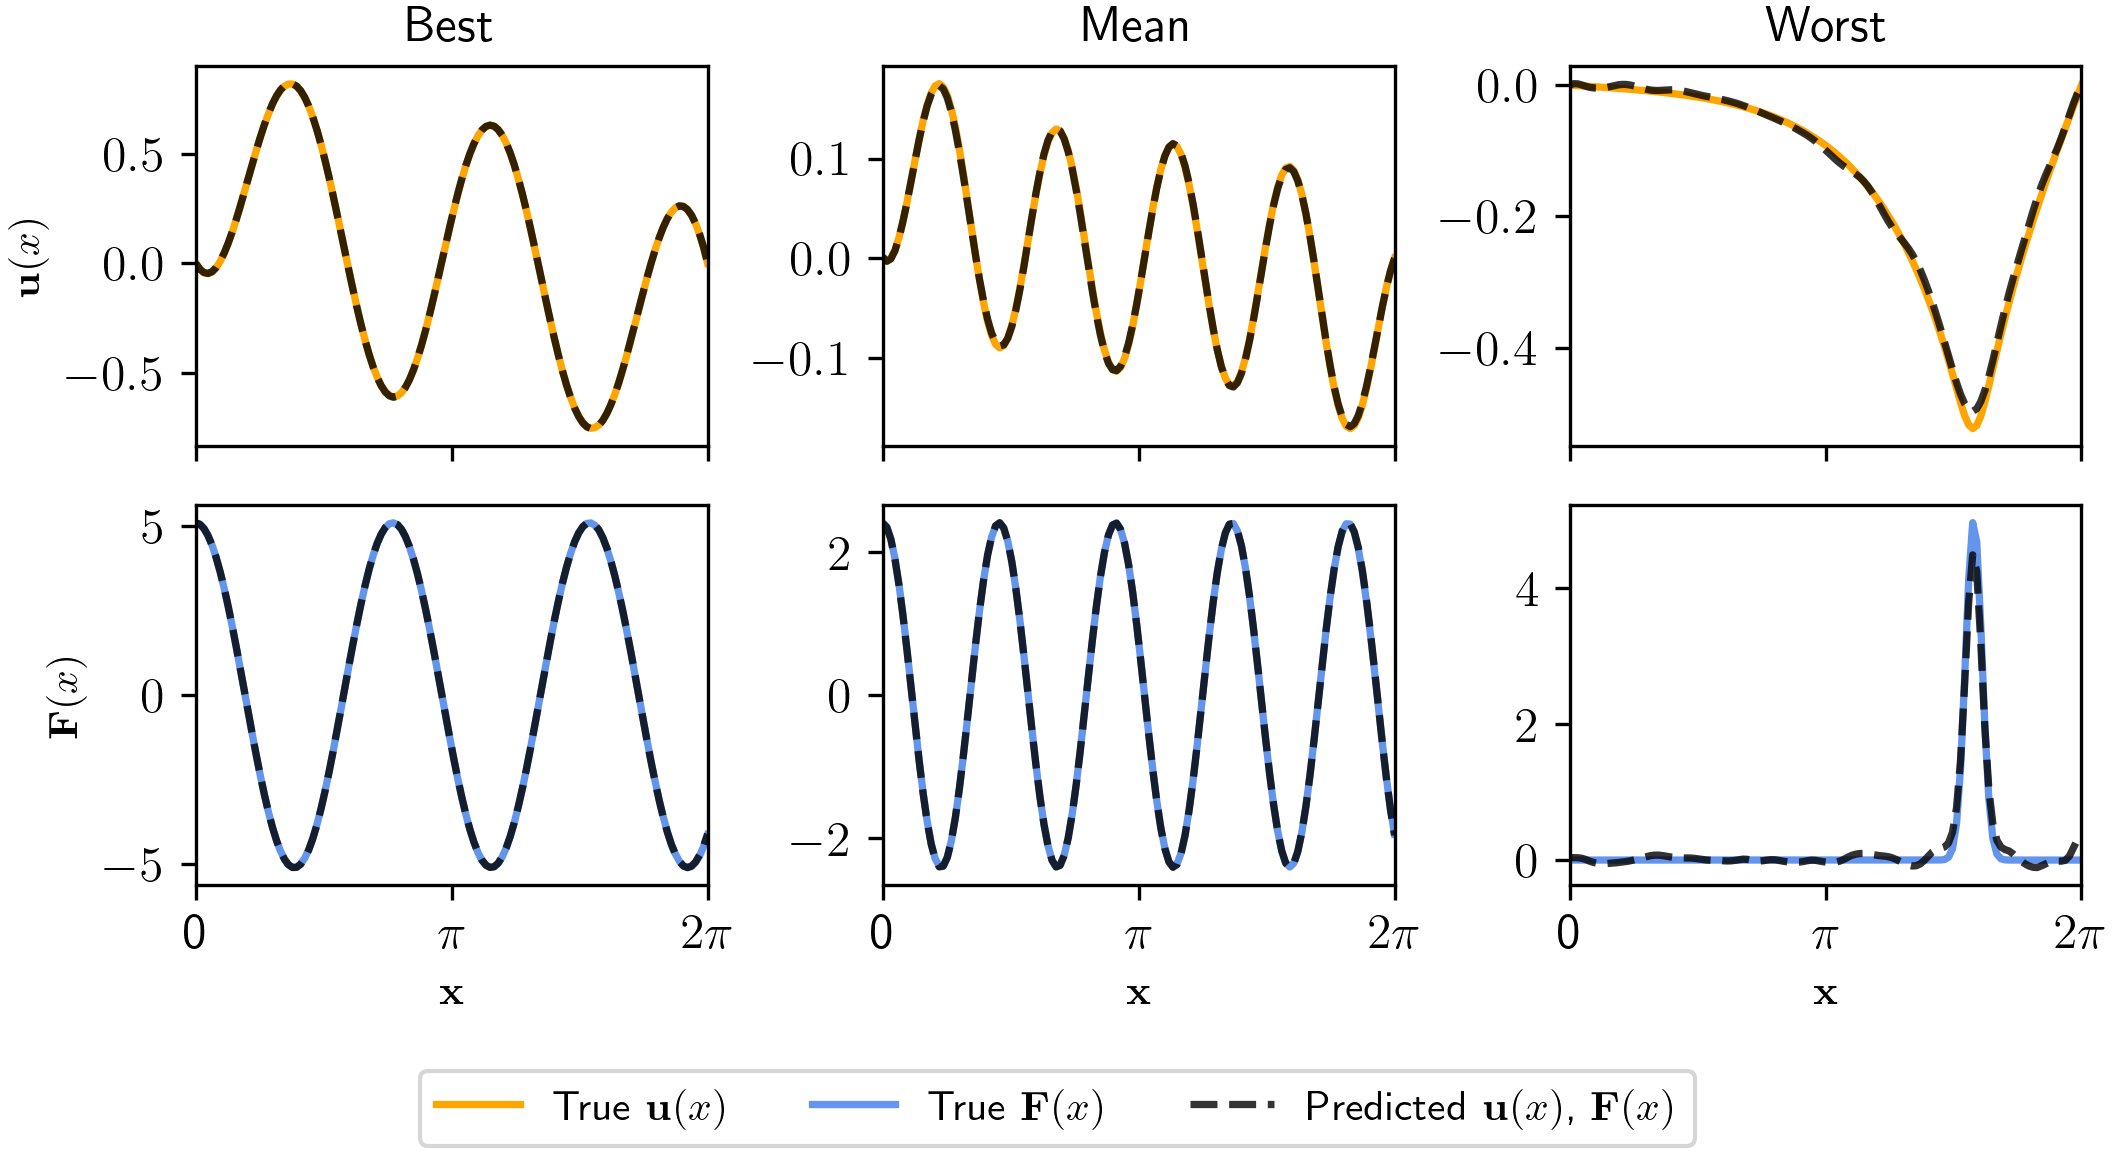

In [4]:
plt.rcdefaults()
plot_params = full_params.copy()
plot_params['lines.linewidth'] = 1.75
plt.rcParams.update(plot_params)

######################################
## Predicted vs true plots - test 1
######################################
prediction_compare_plot(expt, "test1")

if saveallfigs:
    plt.savefig("{}-test1.png".format(expt.name), transparent=True)

plt.show()

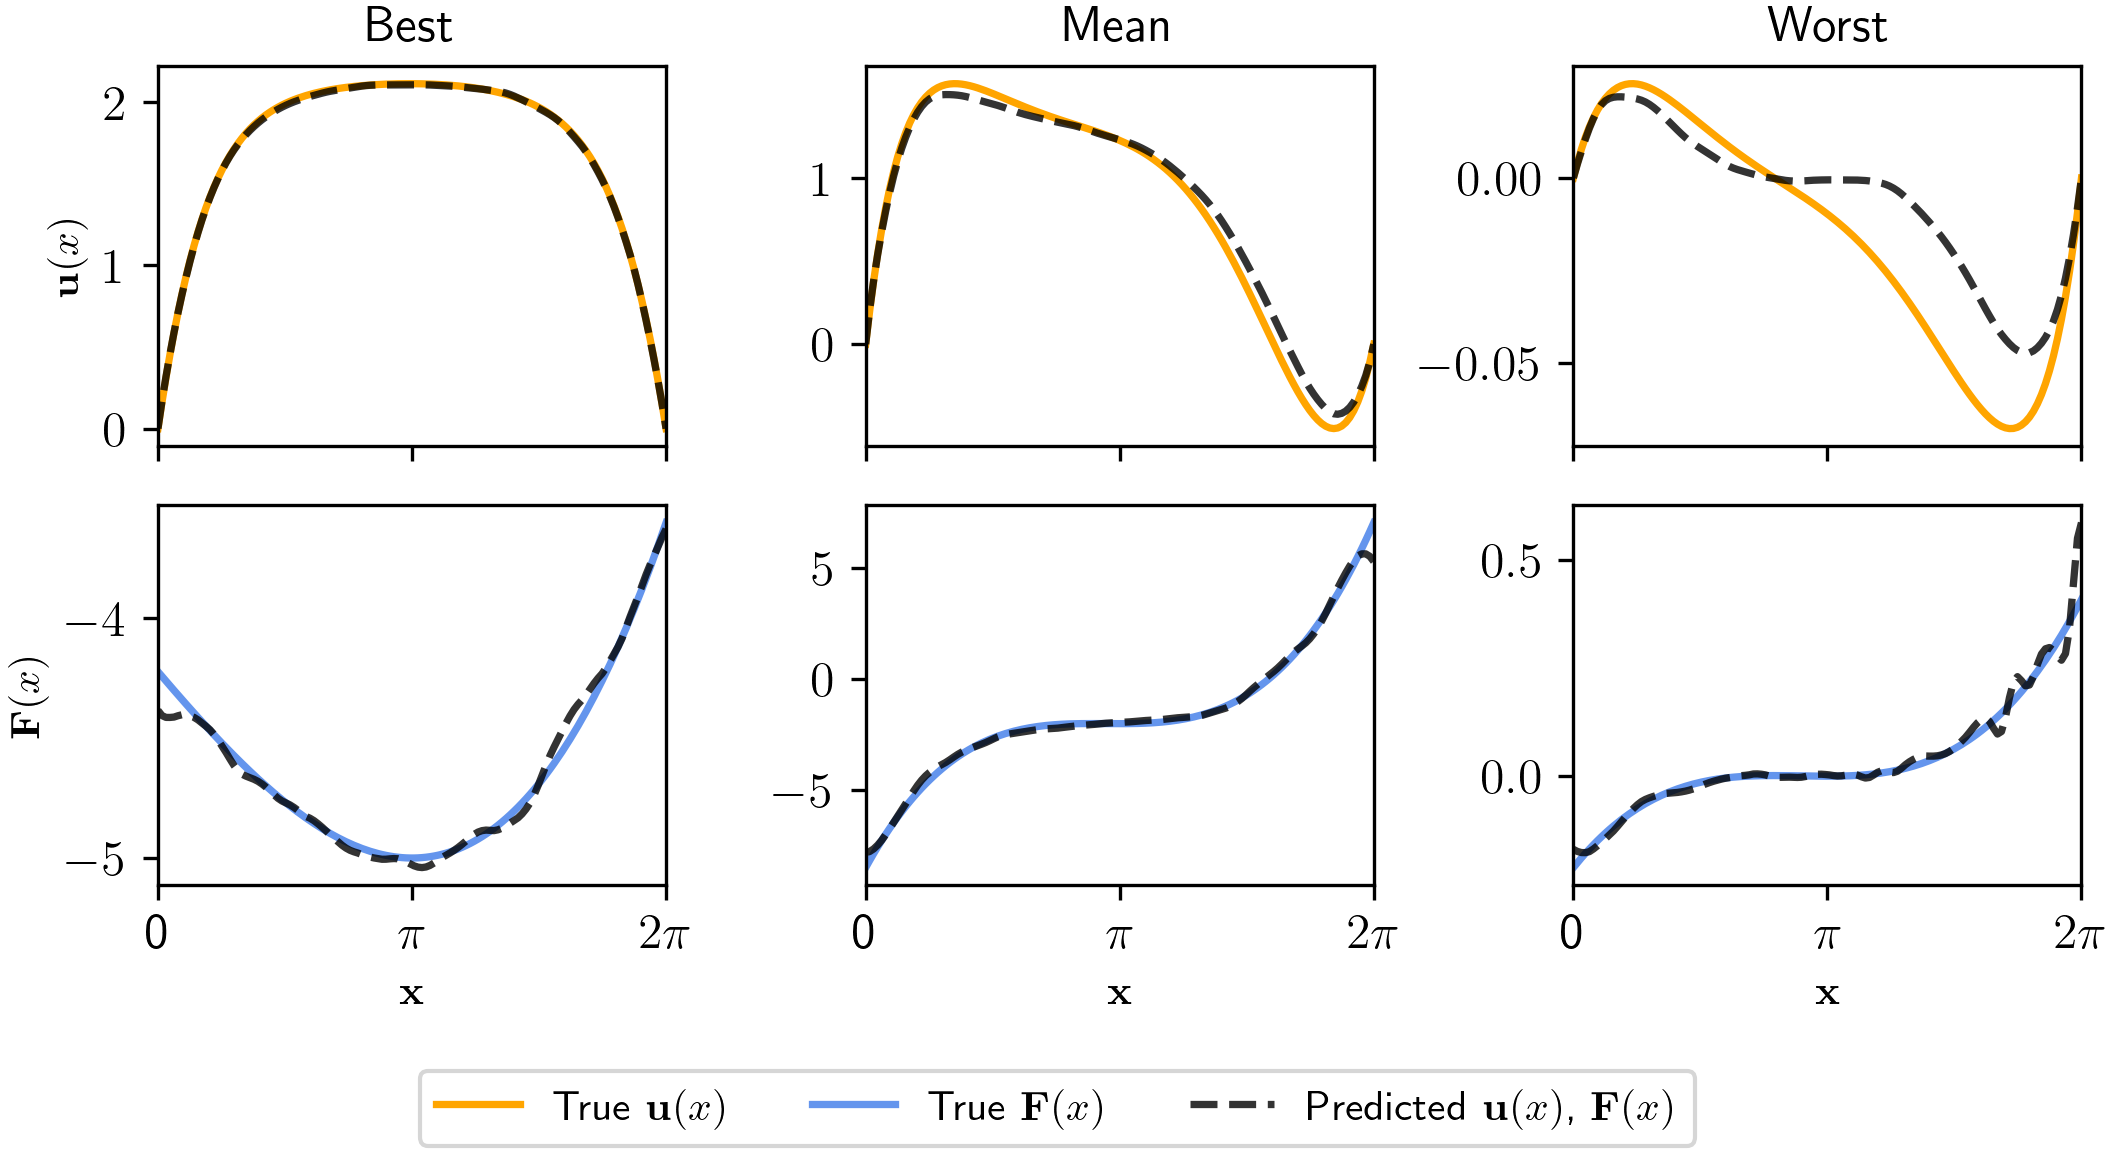

In [5]:
plt.rcdefaults()
plot_params = full_params.copy()
plot_params['lines.linewidth'] = 1.75
plt.rcParams.update(plot_params)

######################################
## Predicted vs true plots - test 2
######################################
prediction_compare_plot(expt, "test2")

if saveallfigs:
    plt.savefig("{}-test2.png".format(expt.name), transparent=True)

plt.show()


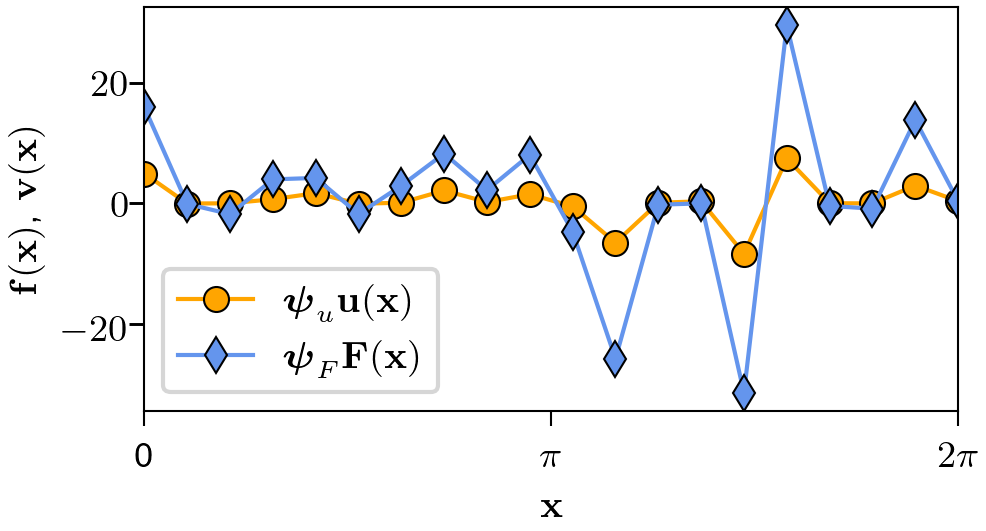

In [6]:
plt.rcdefaults()
plot_params = half_params.copy()
plot_params['figure.figsize'] = (3.5,1.75)
plt.rcParams.update(plot_params)


latent_space_plot(expt, index=14, dataset_name='train1')

if saveallfigs:
    plt.savefig("{}-latentspace.png".format(expt.name), transparent=True)

plt.show()

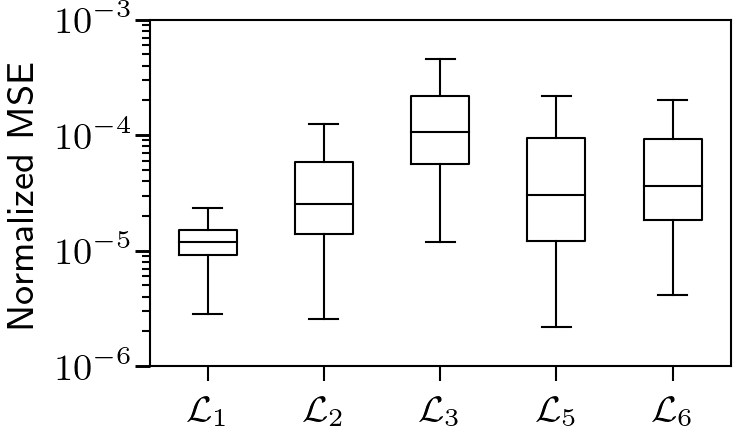

In [7]:
plt.rcdefaults()
plot_params = half_params.copy()
plot_params.update(boxplot_params)
plot_params['figure.figsize'] = (2.5, 1.5)
plt.rcParams.update(plot_params)

loss_boxplot(expt, dataset_name='test1')

# Save, if saving figures
if saveallfigs or savesumfigs:
    plt.savefig("{}-boxplot.svg".format(expt.name))

plt.show()

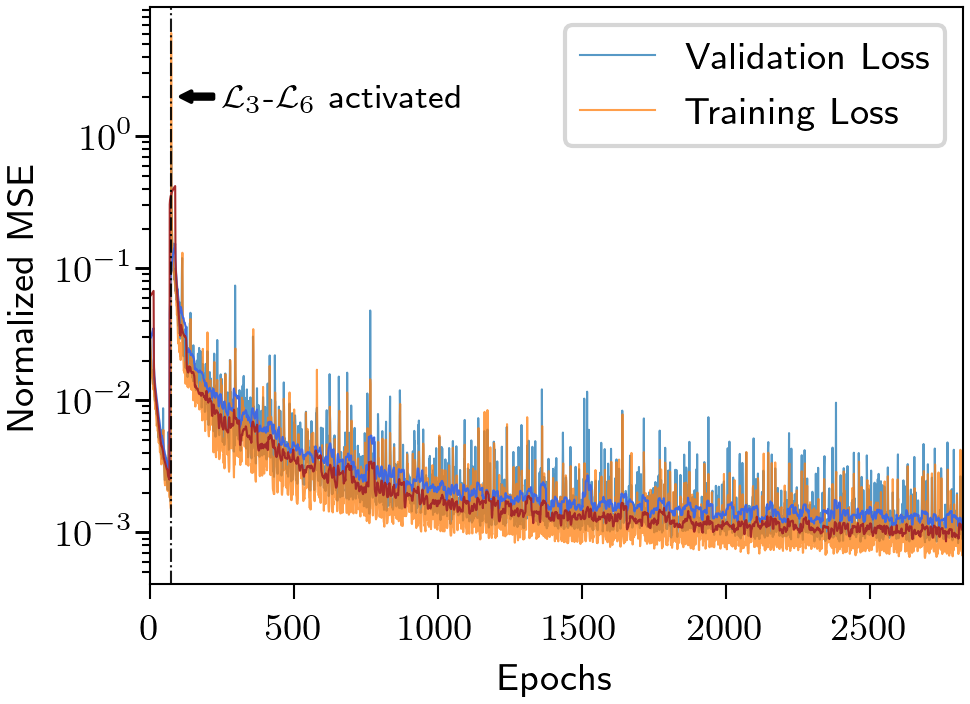

In [8]:
# Set up plotting options
plt.rcdefaults()
plot_params = half_params.copy()
plot_params['lines.linewidth'] = 0.5
plot_params['font.size'] = 8
plt.rcParams.update(plot_params)

###########################
## Val/Train Loss Curves
###########################
training_loss_epochs_plot(expt, roll_window=20)

if saveallfigs:
    plt.savefig("{}-TrainingLoss.png".format(expt.name), transparent=True)

plt.show()

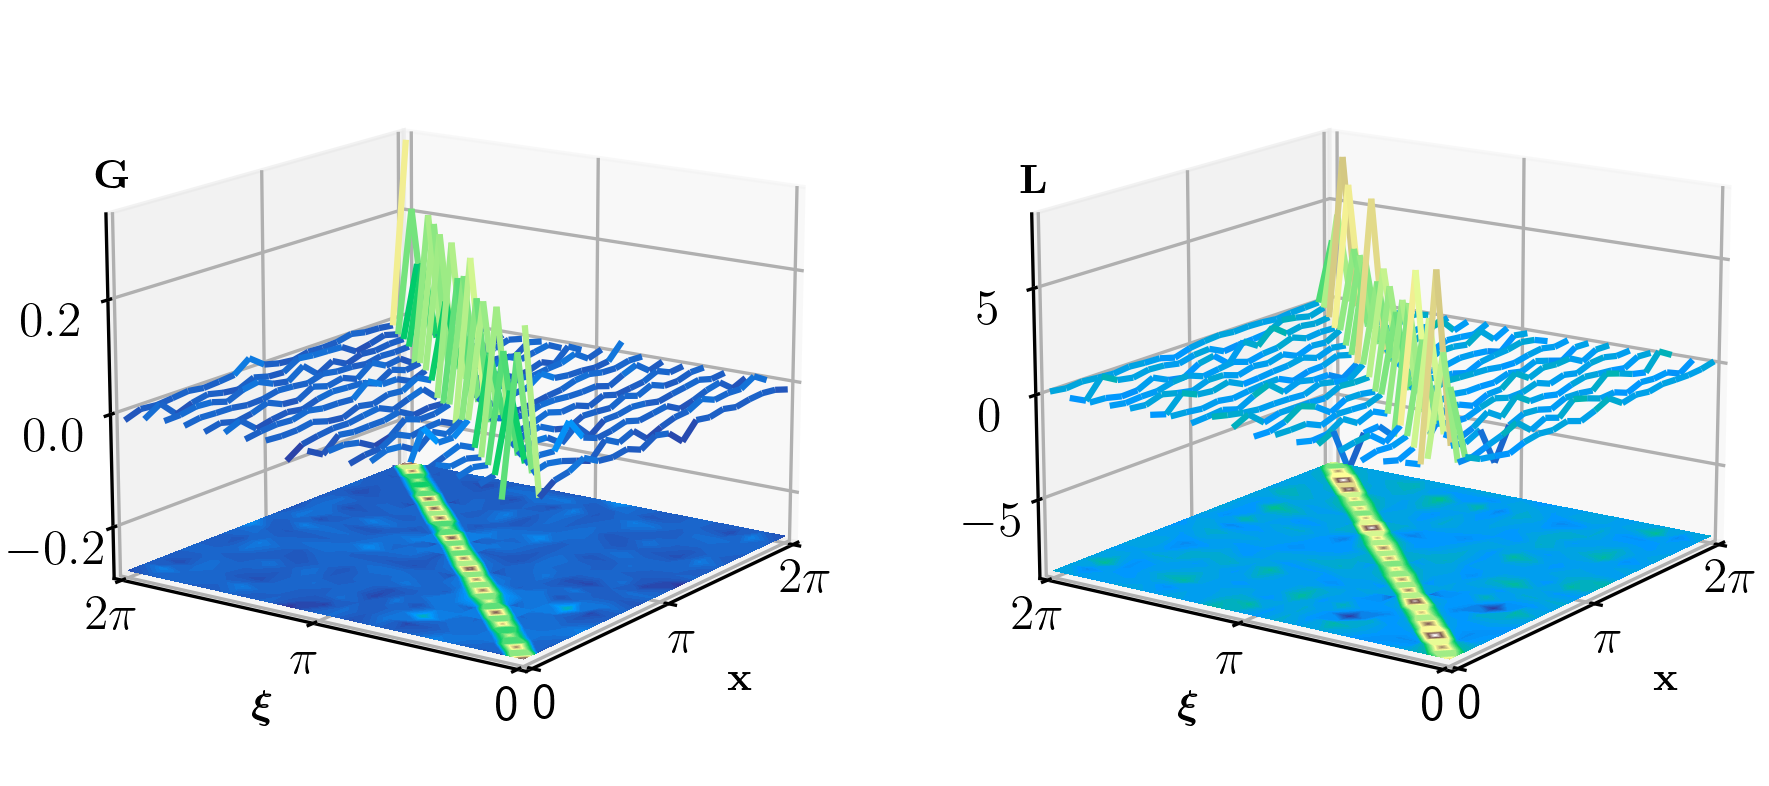

In [9]:
plt.rcdefaults()
plt.rcParams.update(full_params)

generate_GL_plot(expt)

if saveallfigs:
    plt.savefig("{}-L_and_G.png".format(expt.name), transparent=True)
    
plt.show()

In [10]:
# Load up the other 1D experiments for making summary plot boxplot
s1 = Experiment(experiment_name="S1-NLSL1-Expt1-L20-a", data_file_prefix='S1-NLSL1')
s2 = Experiment(experiment_name="S2-NLSL2-Expt1-L20-b", data_file_prefix='S2-NLSL2')

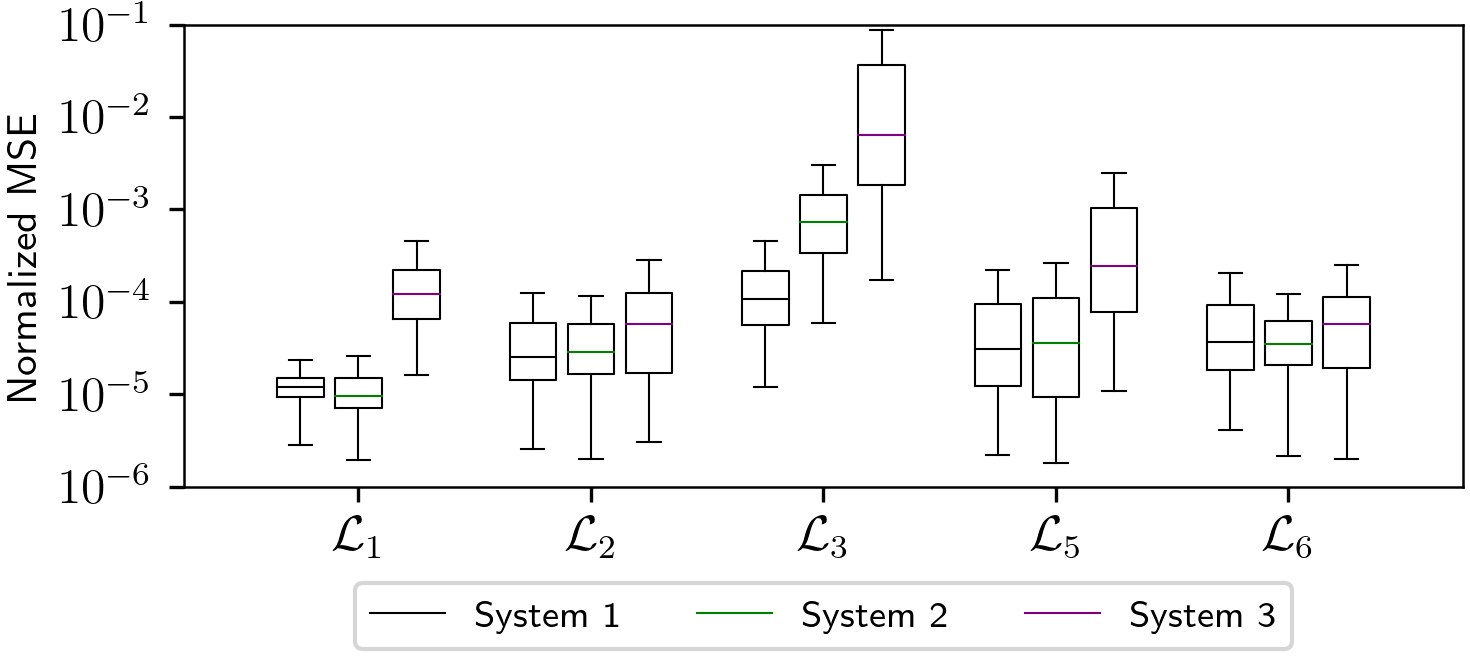

In [11]:
plt.rcdefaults()
plot_params = full_params.copy()
plot_params.update(boxplot_params)
plot_params['axes.linewidth'] = 0.6
plot_params['figure.figsize'] = (5.5,2)
plot_params['legend.fontsize'] = 9
plt.rcParams.update(plot_params)

summary_boxplot(s0, s1, s2)

# Save, if saving figures
if saveallfigs or savesumfigs:
    plt.savefig("{}-summary_boxplot.svg".format(expt.name))


plt.show()

S0-NLSL1-Expt1-L20-a
S1-NLSL1-Expt1-L20-a
S2-NLSL2-Expt1-L20-b


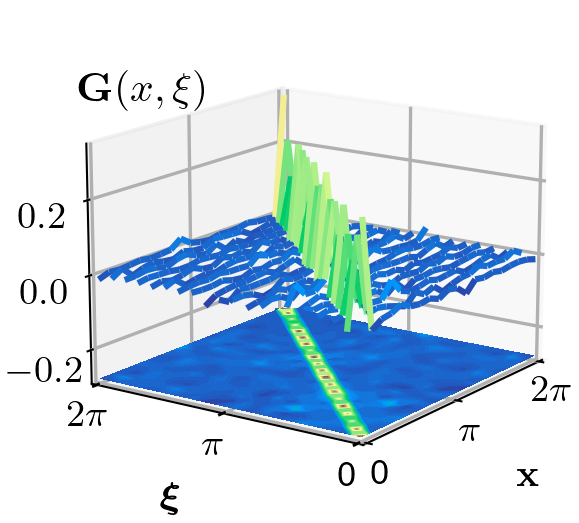

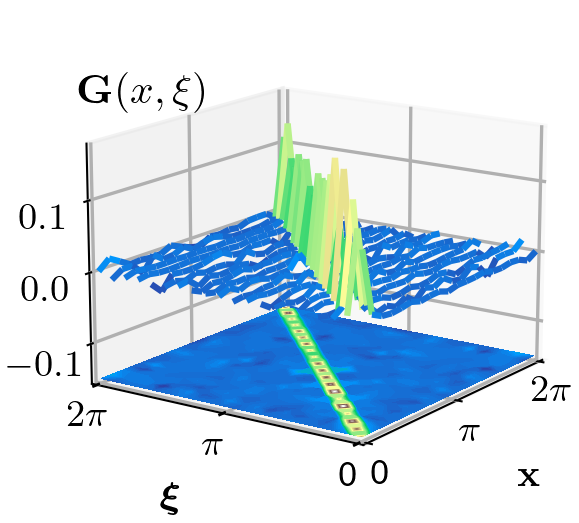

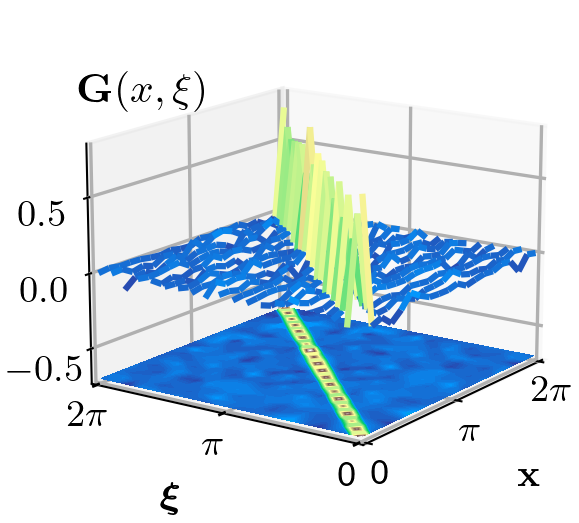

In [12]:
plt.rcdefaults()
plot_params = half_params.copy()
plot_params['figure.figsize'] = (2.2,2.2)
plt.rcParams.update(plot_params)

figs = []
for expt in [s0, s1, s2]:
    fig = generate_G_plot(expt)
    print(expt.name)
    figs.append(fig)
    
if saveallfigs:
    for fig, expt in zip(figs, [s0, s1, s2]):
        plt.figure(fig.number)
        plt.savefig("{}-mini-G.png".format(expt.name))

plt.show()

In [13]:
s0.evaluate_model('train1')

279/279 [==============================] - 0s 824us/step - loss: 6.6500e-04 - output_1_loss: 4.5876e-05 - output_2_loss: 2.4770e-05 - output_3_loss: 7.4239e-05 - output_4_loss: 6.8893e-05


[0.0006650020950473845,
 4.587606599670835e-05,
 2.4770228264969774e-05,
 7.423925853800029e-05,
 6.889317592140287e-05]

In [14]:
s0.evaluate_model('test1')

39/39 [==============================] - 0s 1ms/step - loss: 8.1880e-04 - output_1_loss: 6.2296e-05 - output_2_loss: 6.2254e-05 - output_3_loss: 1.5258e-04 - output_4_loss: 9.0450e-05


[0.0008188001811504364,
 6.229623249964789e-05,
 6.225447577890009e-05,
 0.00015257652557920665,
 9.044952457770705e-05]

In [15]:
s2.evaluate_model('test1')

39/39 [==============================] - 0s 823us/step - loss: 0.0100 - output_1_loss: 1.2756e-04 - output_2_loss: 3.4994e-04 - output_3_loss: 0.0072 - output_4_loss: 1.1468e-04


[0.01001834124326706,
 0.00012755744683090597,
 0.00034993747249245644,
 0.007200788706541061,
 0.00011467900912975892]

In [16]:
0.01-(0.00012755744683090597 + 0.00034993747249245644 + 0.007200788706541061 + 0.00011467900912975892)

0.0022070373650058175